## Load data

In [1]:
from decimal import Decimal
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
import seaborn as sns
from scipy import stats
from pathlib import Path
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

### x denotes unidentifiable syllable

In [25]:
data_path = Path('./data')
csv_file = data_path / 'SimilarityIndex.csv'
df = pd.read_csv(csv_file)
df = df.loc[df['NoteX']==False]
bird_list = list(df['BirdID'].unique())

csv_file = data_path / 'NoteX.csv'
df_x = pd.read_csv(csv_file)
display(df_x.head(10))

df_mean_x  = df_x.groupby(['BirdID'])['SimilarityMean'].max().to_frame()
df_mean_x['Condition'] = 'BMI_x'
df_mean_x.reset_index(inplace=True)
display(df_mean_x)

,Index,BirdID,BasisNote,SimilarityMean,SimilaritySEM
0,0,k71o7,i,0.481081,0.008860
1,1,k71o7,j,0.320781,0.008222
2,2,k71o7,a,0.337064,0.007050
3,3,k71o7,b,0.400558,0.007476
4,4,k71o7,c,0.278463,0.007031
5,5,k71o7,d,0.282416,0.005903
6,6,k71o7,z,0.250782,0.004217
7,7,y3y18,i,0.442882,0.005241
8,8,y3y18,j,0.451288,0.003714
9,9,y3y18,b,0.240031,0.003970


,BirdID,SimilarityMean,Condition
0,b86g86,0.562635,BMI_x
1,k71o7,0.481081,BMI_x
2,k77r57,0.431825,BMI_x
3,o54w8,0.579386,BMI_x
4,y3y18,0.451288,BMI_x


In [3]:
## Create multiple dataframes per bird
df_g20r5  = df[df['BirdID'] == 'g20r5']
df_y58y59  = df[df['BirdID'] == 'y58y59']
df_k71o7 = df[df['BirdID'] == 'k71o7']
df_y3y18   = df[df['BirdID'] == 'y3y18']
df_o54w8  = df[df['BirdID'] == 'o54w8']
df_k77r57 = df[df['BirdID'] == 'k77r57']
df_b86g86  = df[df['BirdID'] == 'b86g86']

### Compare syllable similarity across different conditions

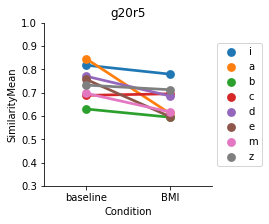

In [4]:
fig = plt.figure(figsize=(3,3))
ax = sns.pointplot(x="Condition", y="SimilarityMean", hue = "Note", data = df_g20r5,
                   size=8, jitter=0.1, order=["baseline", "BMI"], edgecolor="black", 
                   alpha =.9, linewidth = .5)
ax.spines['right'].set_visible(False), ax.spines['top'].set_visible(False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('g20r5')
ax.set_ylim([0.3, 1])
plt.show()

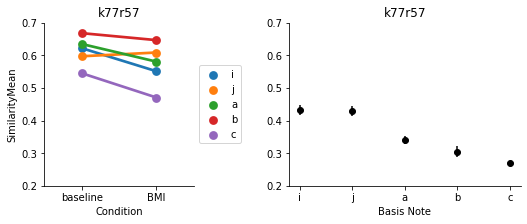

In [5]:
birdID = 'k77r57'
df_temp = df_x.loc[df_x['BirdID']==birdID]
df_temp

gs = gridspec.GridSpec(1, 7)

fig = plt.figure(figsize=(10,3))

ax = plt.subplot(gs[0,0:2])
sns.pointplot(x="Condition", y="SimilarityMean", hue="Note", 
                   data=df[df['BirdID'] == birdID], order=["baseline", "BMI"])
ax.spines['right'].set_visible(False), ax.spines['top'].set_visible(False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title(birdID)
ax.set_ylim([0.2, 0.7])

ax_x = plt.subplot(gs[0,3:-1], sharey= ax)
ax_x.errorbar(df_temp['BasisNote'], df_temp['SimilarityMean'], df_temp['SimilaritySEM'], fmt = 'o', color='k')
ax_x.spines['right'].set_visible(False), ax_x.spines['top'].set_visible(False)
ax_x.set_title(birdID)
ax_x.set_xlabel('Basis Note')

plt.show()

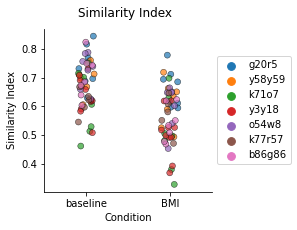

In [6]:
# Plot similarity index for 'x'
fig = plt.figure(figsize=(3,3))
plt.suptitle('Similarity Index')
ax = plt.subplot(111)
ax = sns.stripplot(x="Condition", y="SimilarityMean", hue = "BirdID", data = df,
                   size=6, jitter=0.1, order=["baseline", "BMI"], edgecolor="black", 
                   alpha =.7, linewidth = .5)
ax.spines['right'].set_visible(False), ax.spines['top'].set_visible(False)
ax.set_ylabel('Similarity Index')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

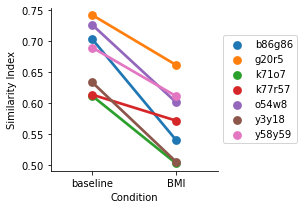

In [11]:
data_per_bird= df.groupby(['BirdID','Condition'], as_index=False)['SimilarityMean'].mean()

fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.pointplot(x="Condition", y="SimilarityMean", hue="BirdID", 
                   data=data_per_bird, ci=None, order=["baseline", "BMI"])

ax.spines['right'].set_visible(False), ax.spines['top'].set_visible(False)
ax.set_ylabel('Similarity Index')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Compare syllable similiarity betweeen contron and BMI conditions

-6.8699728609429265 0.0004687462540579769


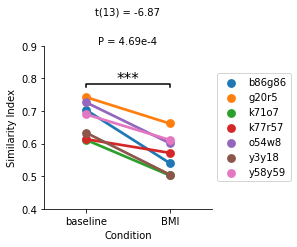

In [12]:
## Stat comparison between baseline and BMI
fig = plt.figure(figsize=(3,3))

data_per_bird.reset_index(inplace = True)
data_per_bird

ax = sns.pointplot(x="Condition", y="SimilarityMean", hue="BirdID", 
                   data=data_per_bird, ci=None, order=["baseline", "BMI"])

ax.spines['right'].set_visible(False), ax.spines['top'].set_visible(False)
ax.set_ylabel('Similarity Index')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## stats  (paired t-test)
baseline, BMI = [],[]
data_per_bird.reset_index(inplace=True)
baseline = data_per_bird.loc[data_per_bird['Condition']=='BMI']['SimilarityMean']
BMI  = data_per_bird.loc[data_per_bird['Condition']=='baseline']['SimilarityMean']
tval, pval = stats.ttest_rel(baseline, BMI)

dof = len(baseline) + len(BMI) - 1

if pval < 0.001:
    sig = '***'
elif pval < 0.01:
    sig = '**'
elif pval < 0.05:
    sig = '*'
else:
    sig = 'ns' 

print(tval, pval)

x1, x2 = 0, 1   
y, h, col = data_per_bird['SimilarityMean'].max()+0.03, 0.01, 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h*0.3, sig, ha='center', va='bottom', color=col, size = 15)   

plt.xlim([-0.5, 1.5])
ax.set_ylim([0.4, 0.9])

y_max = 0.9
msg = ('P = {:.2e}'.format(Decimal(pval)))
plt.text((x1+x2)*.5, y_max*1, msg ,  ha='center', va='bottom', color=col, size = 10)
msg = ('t({:.0f})'.format(dof) + ' = {:.2f}'.format(tval) )
plt.text((x1+x2)*.5, y_max*1.1, msg ,  ha='center', va='bottom', color=col, size = 10)
plt.show()

In [15]:
# merge two tables for comparing three conditions 
# table = pd.merge(data_per_bird, df_mean_x, how="left", left_on='Condition')
df_merged = pd.concat([data_per_bird, df_mean_x], ignore_index=True, sort=True).sort_values('BirdID')
df_merged.drop(columns = ['index'], inplace=True)
df_merged.head()

,BirdID,Condition,SimilarityMean,level_0
0,b86g86,BMI,0.540038,0.0
1,b86g86,baseline,0.703035,1.0
14,b86g86,BMI_x,0.562635,NaN
2,g20r5,BMI,0.661586,2.0
3,g20r5,baseline,0.742296,3.0


In [16]:
## Select for birds under BMI
df_bmi = df_merged.loc[df_merged['Condition']!= 'baseline']
df_bmi = df_bmi[df_bmi.BirdID != 'g20r5']
df_bmi = df_bmi[df_bmi.BirdID != 'y58y59']
df_bmi.head()

,BirdID,Condition,SimilarityMean,level_0
0,b86g86,BMI,0.540038,0.0
14,b86g86,BMI_x,0.562635,NaN
4,k71o7,BMI,0.502362,4.0
15,k71o7,BMI_x,0.481081,NaN
6,k77r57,BMI,0.571526,6.0


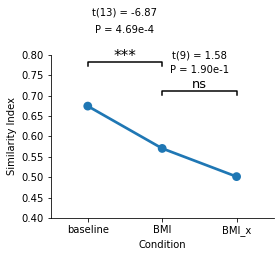

In [36]:
## Stat comparison between baseline and BMI and X
fig = plt.figure(figsize=(4,3))

ax = sns.pointplot(x="Condition", y="SimilarityMean", 
#                    hue="BirdID", 
                   data=df_merged, ci=None, order=["baseline", "BMI","BMI_x"])

ax.spines['right'].set_visible(False), ax.spines['top'].set_visible(False)
ax.set_ylabel('Similarity Index')

## stats  (paired t-test)
baseline, BMI = [],[]
baseline = data_per_bird.loc[data_per_bird['Condition']=='BMI']['SimilarityMean']
BMI  = data_per_bird.loc[data_per_bird['Condition']=='baseline']['SimilarityMean']
tval, pval = stats.ttest_rel(baseline, BMI)

dof = len(baseline) + len(BMI) - 1

if pval < 0.001:
    sig = '***'
elif pval < 0.01:
    sig = '**'
elif pval < 0.05:
    sig = '*'
else:
    sig = 'ns' 

# print(tval, pval)
x1, x2 = 0, 1   
y, h, col = data_per_bird['SimilarityMean'].max()+0.03, 0.01, 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h*0.5, sig, ha='center', va='bottom', color=col, size = 15)   

plt.xlim([-0.5, 2.5])
ax.set_ylim([0.4, 0.8])

y_max = 0.85
msg = ('P = {:.2e}'.format(Decimal(pval)))
plt.text((x1+x2)*.5, y_max*1, msg ,  ha='center', va='bottom', color=col, size = 10)
msg = ('t({:.0f})'.format(dof) + ' = {:.2f}'.format(tval) )
plt.text((x1+x2)*.5, y_max*1.05, msg ,  ha='center', va='bottom', color=col, size = 10)

## stats  (paired t-test betweem BMI and BMI x)
BMI, BMI_x = [],[]
BMI = df_bmi.loc[df_bmi['Condition']=='BMI']['SimilarityMean']
BMI_x  = df_bmi.loc[df_bmi['Condition']=='BMI_x']['SimilarityMean']
tval, pval = stats.ttest_rel(BMI, BMI_x)
dof = len(BMI) + len(BMI_x) - 1

if pval < 0.001:
    sig = '***'
elif pval < 0.01:
    sig = '**'
elif pval < 0.05:
    sig = '*'
else:
    sig = 'ns' 
    
x1, x2 = 1, 2  
y, h, col = df_bmi['SimilarityMean'].max()+0.1, 0.01, 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h*1, sig, ha='center', va='bottom', color=col, size = 13)   

y_max = 0.75
msg = ('P = {:.2e}'.format(Decimal(pval)))
plt.text((x1+x2)*.5, y_max*1, msg ,  ha='center', va='bottom', color=col, size = 10)
msg = ('t({:.0f})'.format(dof) + ' = {:.2f}'.format(tval) )
plt.text((x1+x2)*.5, y_max*1.05, msg ,  ha='center', va='bottom', color=col, size = 10)
plt.show()

In [28]:
## Create a new dataframe for paired comparisons
# columns = ['BirdID', 'Note', 'SimilarityMean(Control)' , 'SimilarityMean(BMI)', 'Entropy(Control)', 'Entropy(BMI)']
# df_new = pd.DataFrame(columns =columns)
df_new = pd.DataFrame()

row_ind = 0
for bird in bird_list:
    temp_df_bird = []
    temp_df_bird = df[df['BirdID'] == bird]
    note_list = temp_df_bird['Note'].unique()
    
    for note in note_list:
        temp_df_note = temp_df_bird[temp_df_bird['Note'] == note]
        temp_df_new = [] 
        temp_df_new = pd.DataFrame({'BirdID' : temp_df_note['BirdID'].unique(),
                                'Note' : temp_df_note['Note'].unique(),  
                                'SimilarityMean(Control)' : temp_df_note[temp_df_note['Condition']=='baseline']['SimilarityMean'].to_numpy(),
                                'SimilarityMean(BMI)' : temp_df_note[temp_df_note['Condition']=='BMI']['SimilarityMean'].to_numpy(),
                                'Entropy(Control)' :  temp_df_note[temp_df_note['Condition']=='baseline']['Entropy'].to_numpy(),
                                'Entropy(BMI)' : temp_df_note[temp_df_note['Condition']=='BMI']['Entropy'].to_numpy(),                                    
                                })
        df_new = df_new.append(temp_df_new, ignore_index=True)
        
# data_path = Path('H:\Box\Data\BMI\Results')
# outputfile = data_path / 'SimilarityMeanPaired.csv'
# df_new.to_csv(outputfile, header=True)
df_new.head(10)

,BirdID,Note,SimilarityMean(Control),SimilarityMean(BMI),Entropy(Control),Entropy(BMI)
0,g20r5,i,0.817728,0.779380,2.703,2.868
1,g20r5,a,0.845864,0.611247,2.781,2.951
2,g20r5,b,0.629694,0.594494,2.920,2.960
3,g20r5,c,0.688339,0.694868,2.787,2.893
4,g20r5,d,0.770466,0.685863,2.726,2.890
5,g20r5,e,0.756962,0.597255,2.650,2.890
6,g20r5,m,0.697075,0.617144,2.779,2.924
7,g20r5,z,0.732239,0.712436,2.773,2.923
8,y58y59,i,0.668479,0.636303,2.740,2.687
9,y58y59,a,0.698525,0.719448,2.722,2.664


In [29]:
df_new['SimilarityMean(Control)'].mean()
df_new['SimilarityMean(BMI)'].mean()
df_new['Entropy(Control)'].mean()
df_new['Entropy(BMI)'].mean()

2.798058823529411

In [30]:
df_bmi_x = df_bmi[df_bmi['Condition']=='BMI_x']
df_bmi_x

,BirdID,Condition,SimilarityMean,level_0
14,b86g86,BMI_x,0.562635,NaN
15,k71o7,BMI_x,0.481081,NaN
16,k77r57,BMI_x,0.431825,NaN
17,o54w8,BMI_x,0.579386,NaN
18,y3y18,BMI_x,0.451288,NaN


## Control syllables vs. BMI vs. unidentifiable syllables

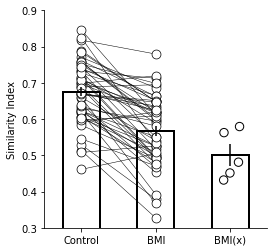

In [34]:
# plot the scatter
dot_size = 80
bar_width = 0.5
width = 0.3
np.random.seed(5)  # random jitter for x
alpha = 0.1
bar_line_width=2

fig = plt.figure(figsize=(4,4))

# plotting the lines
for cluster in range(len(df_new['SimilarityMean(Control)'])):
    ax = plt.plot([0,1], [df_new['SimilarityMean(Control)'][cluster], df_new['SimilarityMean(BMI)'][cluster]],
             'k-', linewidth = 0.5, zorder=1)

# scatter
ax = sns.scatterplot(np.zeros(len(df_new['SimilarityMean(Control)'])), df_new['SimilarityMean(Control)'], 
#                      hue= df_new['BirdID'], 
                     s= dot_size, 
                     color='k',
                     legend = 'full', ec="k", fc="w", zorder=2)

ax = sns.scatterplot(np.ones(len(df_new['SimilarityMean(BMI)'])),df_new['SimilarityMean(BMI)'], 
#                       hue= df_new['BirdID'], 
                      color='k',
                     s= dot_size, ec="k", fc="w", zorder=2)

# bar plot
ax.bar(0, df_new['SimilarityMean(Control)'].mean(), yerr=df_new['SimilarityMean(Control)'].sem(), 
       width=bar_width, fill=None, linewidth=bar_line_width, zorder=3)

ax.bar(1, df_new['SimilarityMean(BMI)'].mean(), yerr=df_new['SimilarityMean(BMI)'].sem(), 
       width=bar_width, fill=None, linewidth=bar_line_width, zorder=3)

ax.bar(2, df_bmi_x['SimilarityMean'].mean(), yerr=df_bmi_x['SimilarityMean'].sem(), 
       width=bar_width, fill=None, linewidth=bar_line_width, zorder=3)

# Scatter for x
x = np.ones(df_bmi_x['SimilarityMean'].shape[0])*2 + (np.random.rand(df_bmi_x['SimilarityMean'].shape[0])*width-width/2.)
ax.scatter(x, df_bmi_x['SimilarityMean'], color='k', s=70,
          facecolors='none', edgecolors='k')    

plt.xticks([0,1,2], ['Control', 'BMI', 'BMI(x)'])
ax.spines['right'].set_visible(False),ax.spines['top'].set_visible(False)
plt.ylim(0.3, 0.9)
plt.xlim(-0.5, 2.5)
plt.ylabel('Similarity Index')
plt.show()